# Web Scraping of a Developer Survey

## About  website

The website contains results of a salary survey of developers.

The table has "No", "Language", "Created By", "Average Annual Salary", and "Learning Difficulty" columns. 

The website is https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html

## Aim of the project

It is set out to:
* scrape the "Language" and "Average Annual Salary" columns on the website
* compare paid salaries per programming language

### Importing libraries

In [23]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Extracting table from the website

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

In [6]:
data = requests.get(url).text
data

'<!doctype html>\n<html lang="en">\n<head>\n<title>\nSalary survey results of programming languages\n</title>\n<style>\ntable, th, td {\n  border: 1px solid black;\n}\n</style>\n</head>\n\n<body>\n<hr />\n<h2>Popular Programming Languages</h2>\n<hr />\n<p>Finding out which is the best language is a tough task. A programming language is created to solve a specific problem. A language which is good for task A may not be able to properly handle task B. Comparing programming language is never easy. What we can do, however, is find which is popular in the industry.</p>\n<p>There are many ways to find the popularity of a programming languages. Counting the number of google searchs for each language is a simple way to find the popularity. GitHub and StackOverflow also can give some good pointers.</p>\n<p>Salary surveys are a way to find out the programmings languages that are most in demand in the industry. Below table is the result of one such survey. When using any survey keep in mind that 

In [7]:
soup = BeautifulSoup(data, 'html5lib')
soup

<!DOCTYPE html>
<html lang="en"><head>
<title>
Salary survey results of programming languages
</title>
<style>
table, th, td {
  border: 1px solid black;
}
</style>
</head>

<body>
<hr/>
<h2>Popular Programming Languages</h2>
<hr/>
<p>Finding out which is the best language is a tough task. A programming language is created to solve a specific problem. A language which is good for task A may not be able to properly handle task B. Comparing programming language is never easy. What we can do, however, is find which is popular in the industry.</p>
<p>There are many ways to find the popularity of a programming languages. Counting the number of google searchs for each language is a simple way to find the popularity. GitHub and StackOverflow also can give some good pointers.</p>
<p>Salary surveys are a way to find out the programmings languages that are most in demand in the industry. Below table is the result of one such survey. When using any survey keep in mind that the results vary year o

In [8]:
table = soup.find('table')
for row in table.find_all('tr') :
    cols = row.find_all('td')
    language_name = cols[1].getText()
    annual_average_salary = cols[3].getText()
    print("{}--->{}".format(language_name, annual_average_salary))

Language--->Average Annual Salary
Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082


### Saving the table as a csv file

In [9]:
from itertools import zip_longest
import csv
table = soup.find('table')
language_name = []
annual_average_salary=[]
for row in table.find_all('tr') : 
    cols = row.find_all('td')
    language_name.append(cols[1].getText().format())
    annual_average_salary.append(cols[3].getText().format())
print(language_name,annual_average_salary)
all_data = [language_name,annual_average_salary]
exported_data = zip_longest(*all_data)
with open('popular-languages.csv', 'w',  newline='') as output:
    wr = csv.writer(output)
    wr.writerows(exported_data)
output.close()

['Language', 'Python', 'Java', 'R', 'Javascript', 'Swift', 'C++', 'C#', 'PHP', 'SQL', 'Go'] ['Average Annual Salary', '$114,383', '$101,013', '$92,037', '$110,981', '$130,801', '$113,865', '$88,726', '$84,727', '$84,793', '$94,082']


### Reading the csv file

In [18]:
df = pd.read_csv('popular-languages.csv')
df

,Language,Average Annual Salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


In [19]:
df['Average Annual Salary']=df['Average Annual Salary'].str.replace('$','')
df['Average Annual Salary']=df['Average Annual Salary'].str.replace(',','')
df['Average Annual Salary']=df['Average Annual Salary'].astype(float)
df.sort_values('Average Annual Salary', ascending=False, inplace=True)
df.head()

,Language,Average Annual Salary
4,Swift,130801.0
0,Python,114383.0
5,C++,113865.0
3,Javascript,110981.0
1,Java,101013.0


### Visualization of the dataset

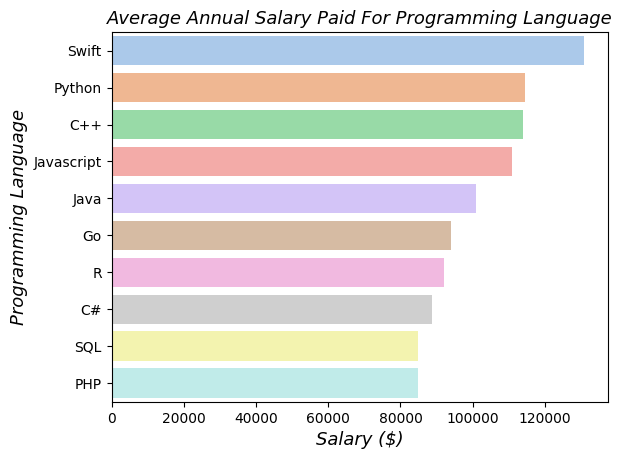

In [24]:
sns.barplot(data=df,x='Average Annual Salary', y='Language',
            hue='Language', orient='h', palette='pastel')
plt.xlabel('Salary ($)',fontsize='13', style='italic')
plt.ylabel('Programming Language',fontsize='13', style='italic')
plt.title('Average Annual Salary Paid For Programming Language', fontsize='13', style='italic')
plt.show()

## Results and Discussion

The scraped website encompasses the results of a salary survey. On the web page, only the "Language" and "Average Annual Salary" columns were scraped and written in a CSV file. After post-processing the CSV file, the programming languages were sorted by average annual salary. 

In descending order of average annual salary, the progamming languages are listed as Swift, Python, C++, Javascript, Java, Go, R, C#, SQL, and PHP. It is apparent from the bar plot that Swif brings significantly more average annual salary to a developer than Python and C++. This suggests that early-career developers or fresh graduates should invest their time to learn Swift. 